In [9]:
import math
import random
import time
import numpy as np
def eggholder(x,y):
    """
    input x, y
    return egghold funtion
    """
    return (y+47)*math.sin(math.sqrt(abs(x/2+(y+47))))- x*math.sin(math.sqrt(abs(x-(y+47))))

In [10]:
def random_xy():
    """
    return two random float number 
    in range (-10000, 10000)
    for inital points.
    """
    x=random.uniform(-10000,10000)
    y=random.uniform(-10000,10000)
    return x, y

In [11]:
def new_pos(x,y):
    """
    randomly choose a new position
    """
    x=(random.random()-0.5)*0.1+x
    y=(random.random()-0.5)*0.1+y
    return x,y

In [12]:
def hill_climb_search():
    minima=[]
    for i in range(100):
        x,y = random_xy()
        best_so_far=eggholder(x,y)
        count=0
        while count <= 100:
            x1,y1=new_pos(x,y)
            if best_so_far > eggholder(x1,y1):
                count=0
                best_so_far= eggholder(x1,y1)
            else:
                count=count+1
                
        minima.append(best_so_far)
    return minima
                
    

In [13]:
starttime=time.time()
minima=hill_climb_search()
endtime=time.time()
time_taken = endtime - starttime
print(minima)
print("Found in time: ")
print(time_taken)

[-4172.814500405272, 6942.998012259428, -3187.6744673336552, -1871.78867813073, 2125.919614401137, 454.12420541610413, -2090.9558220090034, 4475.51716346913, -3339.933519128593, -4633.4302528963135, 468.32852982106965, 4145.74584604728, -4292.999159463998, 8746.776767831998, 4359.116630708124, -10986.028374759899, -2233.8079555188647, 9198.892122070869, -1372.6255950909772, -7664.999941879902, 3281.866040483021, 3243.5853340270914, -4447.334998736309, 7074.075071283087, -5550.765926463688, -718.2627798517866, 3785.3962583660195, -5505.115032628203, -4909.141196674707, -1574.6490086095732, 10183.449761494858, -3329.910274046467, 4558.235988161401, -4639.212357576471, -4598.58154806397, 4772.402735888481, 12252.960008787777, 6893.262066762271, -2514.0683774346153, -9150.506975988232, 949.0038094933268, 237.93171696898182, -979.2680130545759, -6711.364311586016, 6526.81628382479, 365.24754785933465, -8614.669910985354, 3877.757391846733, 8939.681578882353, 1132.7452609194409, 2337.4748995

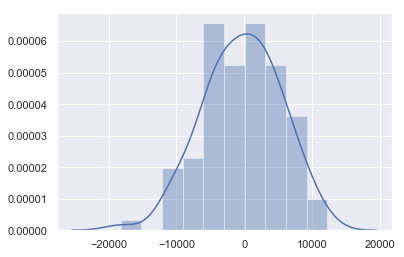

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
sns.distplot(minima,bins=10)
plt.show()

In [15]:
def differential_evolution():
    """
    use differential evolution to find global min
    """
    
    np=20
    f=0.8
    nc=1000
    cr=0.6
    pool=[]
    mins=[]
    for a in range(np):
        pool.append(random_xy())
    #print('begin:',pool)
    for k in range(nc):
        pool_copy=pool.copy()
        for i in range(np):
            xi,yi=pool_copy[i]
            r0,r1,r2=random.sample(range(20), 3)
            #make sure r0,r1,r2 != i
            while r0==i or r1==i or r2==i:
                r0,r1,r2=random.sample(range(20), 3)
            xr0,yr0=pool_copy[r0]
            xr1,yr1=pool_copy[r1]
            xr2,yr2=pool_copy[r2]
            while True:
                v1=xr0+f*(xr1-xr2)
                v2=yr0+f*(yr1-yr2)
                #check v1 and v2 in the range
                if -10000 <= v1 <= 10000 and -10000 <= v2 <= 10000:
                    break
                else:
                    f =f/2
            u=random.uniform(0, 1)
            if u<cr:
                u1=v1
                u2=v2
            else:
                u1=xi
                u2=yi
            if eggholder(u1,u2)<eggholder(xi,yi):
                pool[i]=u1,u2
            else:
                pool[i]=pool_copy[i]
    #find smallest value in pool we got finally
    #print('end:',pool)
    for i in range(len(pool)):
        x,y=pool[i] 
        mins.append(eggholder(x,y))
    return min(mins) 

In [16]:
starttime2=time.time()
minima2=[]
for i in range(100):
        minima2.append(differential_evolution())
        
print(minima2)
endtime2=time.time()
time_taken2 = endtime2 - starttime2
print("Found in time: ")
print(time_taken2)

[-17703.296302084513, -17954.418955242276, -16653.052755916564, -14378.180460141586, -16581.187838210768, -12729.37039034628, -13020.007371090167, -13564.03400610657, -16920.570071761715, -9084.880433510574, -15144.07161104976, -15331.17341371184, -18559.712410571956, -13883.493489922415, -15285.970290022064, -18225.492022432016, -15444.668091203886, -17194.16794902271, -13549.689652747911, -14819.024790231802, -14943.35172282712, -12605.62718802019, -17288.663274304345, -13180.354779692962, -16487.57984915338, -14103.363178652442, -14511.161521904232, -9645.180343060963, -14340.491557080784, -15265.373432423574, -15885.405629040057, -13277.654490432085, -11756.927715012509, -15885.204956767626, -17796.054966595744, -13646.287408860071, -12389.266626823115, -13096.364087618422, -18798.354035441957, -15449.405017959964, -16090.66455604694, -12058.63621035948, -15968.660885130768, -15823.368893399507, -17461.29968485415, -15764.134688764552, -12448.857026443986, -12722.904695954694, -173

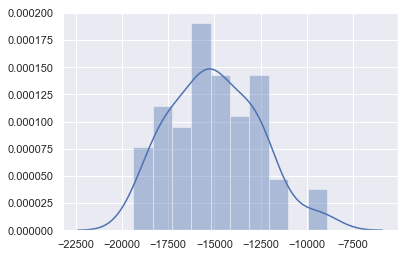

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
sns.distplot(minima2,bins=10)
plt.show()    

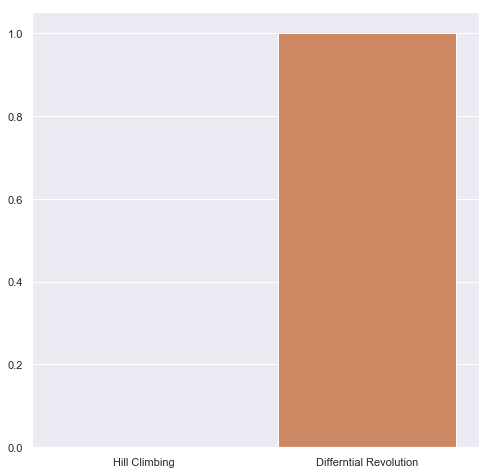

In [18]:
from matplotlib import pyplot

size = (8, 8)
fig, ax = pyplot.subplots(figsize=size)

time= [time_taken, time_taken2]
bars = ('Hill Climbing', 'Differntial Revolution')
y_pos = np.arange(len(bars))
sns.barplot(x=bars, y=y_pos)
plt.xticks(y_pos, bars)
plt.show()